# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [18]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets

import warnings
warnings.filterwarnings('ignore')

In [19]:
pn.extension()

In [20]:
# Read the Mapbox API key
load_dotenv("l:/mapbox.env")
map_box_api = os.getenv("map_box_key")


## Load Data

In [21]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()



neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [22]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!

sfo_data_year_mean=sfo_data.groupby("year").mean()
sfo_data_year_mean.head()

sale_price_sqr_foot  housing_units  gross_rent
year                                                
2010           369.344353         372560        1239
2011           341.903429         374507        1530
2012           399.389968         376454        2324
2013           483.600304         378401        2971
2014           556.277273         380348        3528

In [23]:
# Save the dataframe as a csv file
# YOUR CODE HERE!
sfo_data.to_csv("Data/sfo_data_year_mean.csv")

In [24]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!

plot_data_year_mean1 = sfo_data_year_mean["housing_units"]

plot_data_year_mean = plot_data_year_mean1.sort_values()


plot_data_graph = plot_data_year_mean.hvplot.bar(label="Housing Units in San Francisco From 2010 to 2016", rot=90,ylim=[370000, 390000],ylabel="housing_units")



# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

In [25]:
plot_data_graph.opts( yformatter="%.0f")


:Bars   [year]   (housing_units)

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [26]:
# Calculate the average sale price per square foot and average gross ren
housing_cost_year = sfo_data_year_mean[["sale_price_sqr_foot","gross_rent"]]

# YOUR CODE HERE!


In [27]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
sales_price_mean= sfo_data_year_mean["sale_price_sqr_foot"]
plot_sales_price_graph = sales_price_mean.hvplot.line(label="Housing Units in San Francisco From 2010 to 2016", rot=90, ylim=[300,700],ylabel="sale_price_sqr_foot")
plot_sales_price_graph 
# YOUR CODE HERE!

:Curve   [year]   (sale_price_sqr_foot)

In [28]:
# Line chart for average montly rent
gross_rent_mean= sfo_data_year_mean["gross_rent"]
plot_rent_graph = gross_rent_mean.hvplot.line(label="Housing Units in San Francisco From 2010 to 2016", rot=90,ylim=[1000,5000],ylabel="gross_rent")
plot_rent_graph 
# YOUR CODE HERE!

:Curve   [year]   (gross_rent)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [29]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!

sfo_data_year_mean=sfo_data.groupby(["year","neighborhood"]).mean().reset_index()
sfo_data_year_mean.head()


year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239

In [30]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!
def county(neighborhood_p):
    return neighborhood_p
   # house_prices_plot 
San_Francisco_neighborhood = ['Alamo Square','Anza Vista','Bayview','Bayview Heights','Bernal Heights','Buena Vista Park','Central Richmond','Central Sunset','Clarendon Heights','Corona Heights','Cow Hollow','Croker Amazon','Diamond Heights','Downtown','Duboce Triangle','Eureka Valley/Dolores Heights','Excelsior','Financial District North','Financial District South','Forest Knolls','Glen Park','Golden Gate Heights','Haight Ashbury','Hayes Valley','Hunters Point','Ingleside','Ingleside Heights','Inner Mission','Inner Parkside','Inner Richmond','Inner Sunset','Jordan Park/Laurel Heights','Lake --The Presidio','Lone Mountain','Lower Pacific Heights','Marina','Merced Heights','Midtown Terrace','Miraloma Park','Mission Bay','Mission Dolores','Mission Terrace','Nob Hill','Noe Valley','North Beach','North Waterfront','Oceanview','Outer Mission','Outer Parkside','Outer Richmond','Outer Sunset','Pacific Heights','Park North','Parkside','Parnassus/Ashbury Heights','Portola','Potrero Hill','Presidio Heights','Russian Hill','Silver Terrace','South Beach','South of Market','Sunnyside','Telegraph Hill','Twin Peaks','Union Square District','Van Ness/ Civic Center','Visitacion Valley','West Portal','Western Addition','Westwood Highlands','Westwood Park','Yerba Buena',
]
 
display(sfo_data_year_mean)
plot_county_price = sfo_data_year_mean.hvplot.line(x="year", y= "sale_price_sqr_foot", groupby="neighborhood")
interact(county,neighborhood_p= San_Francisco_neighborhood)    
plot_county_price



year                   neighborhood  sale_price_sqr_foot  housing_units  \
0    2010                   Alamo Square           291.182945         372560   
1    2010                     Anza Vista           267.932583         372560   
2    2010                        Bayview           170.098665         372560   
3    2010               Buena Vista Park           347.394919         372560   
4    2010               Central Richmond           319.027623         372560   
5    2010                 Central Sunset           418.172493         372560   
6    2010                 Corona Heights           369.359338         372560   
7    2010                     Cow Hollow           569.379968         372560   
8    2010                  Croker Amazon           165.645730         372560   
9    2010                Diamond Heights           456.930822         372560   
10   2010                      Downtown            241.804552         372560   
11   2010  Eureka Valley/Dolores Heights           403.118313         372560   
12   2010                      Excelsior           364.928336         372560   
13   2010       Financial District North           401.749967         372560   
14   2010       Financial District South           162.821210         372560   
15   2010                  Forest Knolls           209.049327         372560   
16   2010                      Glen Park           715.586438         372560   
17   2010            Golden Gate Heights           551.801119         372560   
18   2010                 Haight Ashbury           254.473779         372560   
19   2010                   Hayes Valley           272.284980         372560   
20   2010                  Hunters Point           170.624920         372560   
21   2010                     Ingleside            275.056686         372560   
22   2010                  Inner Mission           238.350020         372560   
23   2010                 Inner Parkside           199.702004         372560   
24   2010                 Inner Richmond           285.822358         372560   
25   2010                   Inner Sunset           275.769730         372560   
26   2010     Jordan Park/Laurel Heights           419.887812         372560   
27   2010            Lake --The Presidio           320.796910         372560   
28   2010                  Lone Mountain           398.458876         372560   
29   2010          Lower Pacific Heights           374.057636         372560   
..    ...                            ...                  ...            ...   
367  2016                  Inner Mission           647.770447         384242   
368  2016                 Inner Parkside           518.112650         384242   
369  2016                 Inner Richmond           403.311132         384242   
370  2016                   Inner Sunset           445.923828         384242   
371  2016     Jordan Park/Laurel Heights           704.566419         384242   
372  2016          Lower Pacific Heights           636.430770         384242   
373  2016                         Marina           431.944602         384242   
374  2016                 Merced Heights          1416.666667         384242   
375  2016                    Mission Bay           924.569116         384242   
376  2016                Mission Terrace           879.017013         384242   
377  2016                       Nob Hill           777.008315         384242   
378  2016                     Noe Valley           799.495651         384242   
379  2016                    North Beach           407.553322         384242   
380  2016                  Outer Mission            40.772625         384242   
381  2016                 Outer Parkside           732.720684         384242   
382  2016                Outer Richmond           1196.645437         384242   
383  2016                   Outer Sunset           510.576907         384242   
384  2016                Pacific Heights           996.389364         384242   
385  

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [31]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!
def county(neighborhood_p):
     return neighborhood_p
   # house_prices_plot 
San_Francisco_neighborhood = sfo_data_year_mean["neighborhood"]
    
plot_county_rent = sfo_data_year_mean.hvplot.line(x="year", y= "gross_rent", groupby="neighborhood")

  

In [32]:
 

interact(county,neighborhood_p= San_Francisco_neighborhood)
plot_county_rent

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [51]:
# Getting the data from the top 10 expensive neighborhoods to own
# YOUR CODE HERE!


exp_neighborhood =sfo_data_year_mean.sort_values("sale_price_sqr_foot",ascending =False).head(10)
exp_neighborhood.head()


year           neighborhood  sale_price_sqr_foot  housing_units  \
346  2015  Union Square District          2258.702832         382295   
388  2016       Presidio Heights          1465.968586         384242   
374  2016         Merced Heights          1416.666667         384242   
226  2013  Union Square District          1290.472107         378401   
262  2014          Miraloma Park          1267.766203         380348   

     gross_rent  
346        3739  
388        4390  
374        4390  
226        2971  
262        3528

In [34]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
plot_exp_neighborhood = exp_neighborhood.hvplot.bar(x="neighborhood", y= "sale_price_sqr_foot", rot=45,title="10 expensive neighborhoods in SFO")
plot_exp_neighborhood

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [35]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sfo_data_year_mean=sfo_data.groupby(["year","neighborhood"]).mean().reset_index()
sfo_data_year_mean.head()

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239

In [36]:
# Plotting the data from the top 10 expensive neighborhoods
def Graph_county_price(neighborhood_v):
    return  neighborhood_v   

In [37]:
        

San_Francisco_exp_neighborhood = ['Union Square District','Merced Heights','Miraloma Park','Pacific Heights','Westwood Park','Telegraph Hill','Presidio Heights','Cow Hollow','Potrero Hill','South Beach']
interact(Graph_county_price,neighborhood_v= San_Francisco_exp_neighborhood)
#print(neighborhood_v)
#county_data_year_mean=sfo_data_year_mean.dropna().loc[sfo_data_year_mean["neighborhood"]==neighborhood_v]
#Price = county_data_year_mean.hvplot.line(x="year", y= "sale_price_sqr_foot",groupby="neighborhood",width= 300)
#Rent  = county_data_year_mean.hvplot.line(x="year", y= "gross_rent",groupby="neighborhood",width=300)
#Price+Rent       
#interact(Graph_county_price,neighborhood_v= San_Francisco_exp_neighborhood)
    

Column
    [0] Column
        [0] Select(name='neighborhood_v', options=['Union Square District', ...], value='Union Square District')
    [1] Row
        [0] Markdown(str, name='interactive04040')

In [38]:
     
        county_data_year_mean=sfo_data_year_mean.loc[sfo_data_year_mean["neighborhood"]=="Bayview"]
        Price = county_data_year_mean.hvplot.line(x="year", y= "sale_price_sqr_foot",groupby="neighborhood",width= 300)
        Rent  = county_data_year_mean.hvplot.line(x="year", y= "gross_rent",groupby="neighborhood",width=300)
        Price+Rent
        

:Layout
   .DynamicMap.I  :DynamicMap   [neighborhood]
      :Curve   [year]   (sale_price_sqr_foot)
   .DynamicMap.II :DynamicMap   [neighborhood]
      :Curve   [year]   (gross_rent)

In [39]:
#sfo_data_year_mean.set_index('neighborhood')
#sfo_data_year_mean.loc[sfo_data_year_mean["neighborhood"]=="Buena Vista Park"]



- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [40]:
# Load neighborhoods coordinates data
# YOUR CODE HERE!
file_path = Path("Data/neighborhoods_coordinates.csv")
coodinates_data = pd.read_csv(file_path)
coodinates_data.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [41]:
# Calculate the mean values for each neighborhood
sfo_data_neighbourhood_mean=sfo_data.groupby(["neighborhood"]).mean().reset_index()
sfo_data_neighbourhood_mean.head()
# YOUR CODE HERE!

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0     Alamo Square           366.020712       378401.0  2817.285714
1       Anza Vista           373.382198       379050.0  3031.833333
2          Bayview           204.588623       376454.0  2318.400000
3  Bayview Heights           590.792839       382295.0  3739.000000
4  Bernal Heights            576.746488       379374.5  3080.333333

In [42]:
# Join the average values with the neighborhood locations
neighborhood_with_coordinates = pd.concat([sfo_data_neighbourhood_mean, coodinates_data], axis=1, join='inner')
neighborhood_with_coordinates.head()
# YOUR CODE HERE!

neighborhood  sale_price_sqr_foot  housing_units   gross_rent  \
0     Alamo Square           366.020712       378401.0  2817.285714   
1       Anza Vista           373.382198       379050.0  3031.833333   
2          Bayview           204.588623       376454.0  2318.400000   
3  Bayview Heights           590.792839       382295.0  3739.000000   
4  Bernal Heights            576.746488       379374.5  3080.333333   

      Neighborhood        Lat         Lon  
0     Alamo Square  37.791012 -122.402100  
1       Anza Vista  37.779598 -122.443451  
2          Bayview  37.734670 -122.401060  
3  Bayview Heights  37.728740 -122.410980  
4   Bernal Heights  37.728630 -122.443050

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

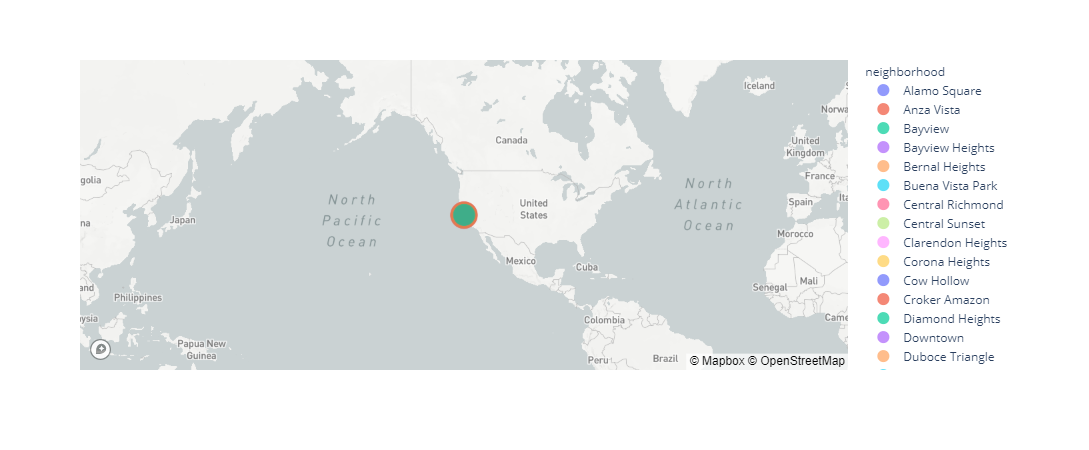

In [58]:
# Set the mapbox access token
# YOUR CODE HERE!
# Read the Mapbox API key
load_dotenv("L:/mapbox.env")
map_box_api = os.getenv("map_box_key")

#  print(map_box_api) =====Testing the key
# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!

data_to_plot = neighborhood_with_coordinates[["neighborhood", "gross_rent", "Lat", "Lon"]]
map_plot = px.scatter_mapbox(
    data_to_plot,
    lat="Lat",
    lon="Lon",
    size="gross_rent",
    color="neighborhood",
    zoom=1
)

# Display the map
map_plot.show()

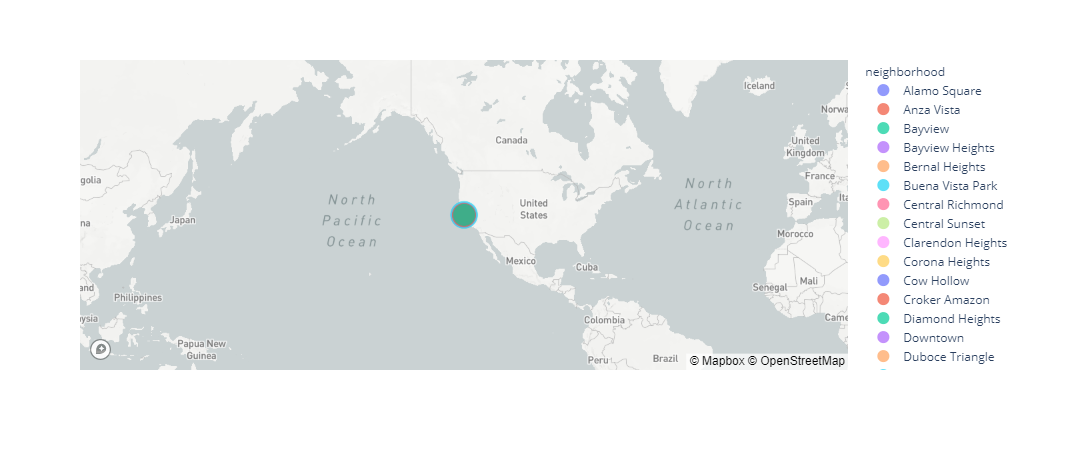

In [57]:
data_to_plot = neighborhood_with_coordinates[["neighborhood", "sale_price_sqr_foot", "Lat", "Lon"]]
map_plot = px.scatter_mapbox(
    data_to_plot,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="neighborhood",
    zoom=1
)

# Display the map
map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [53]:
# Fetch the data from all expensive neighborhoods per year.
#df_exp_neighborhood = sfo_data_year_mean[sfo_data_year_mean["neighborhood"].isin(exp_neighborhood["neighborhood"])]
#df_exp_neighborhood = sfo_data_year_mean[sfo_data_year_mean["neighborhood"].isin(exp_neighborhood["neighborhood"])]
exp_neighborhood

year               neighborhood  sale_price_sqr_foot  housing_units  \
346  2015      Union Square District          2258.702832         382295   
388  2016           Presidio Heights          1465.968586         384242   
374  2016             Merced Heights          1416.666667         384242   
226  2013      Union Square District          1290.472107         378401   
262  2014              Miraloma Park          1267.766203         380348   
386  2016  Parnassus/Ashbury Heights          1207.997485         384242   
382  2016            Outer Richmond           1196.645437         384242   
323  2015                     Marina          1132.837361         382295   
282  2014            South of Market          1119.838877         380348   
300  2015             Corona Heights          1100.791194         382295   

     gross_rent  
346        3739  
388        4390  
374        4390  
226        2971  
262        3528  
386        4390  
382        4390  
323        3739  
282        3528  
300        3739

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


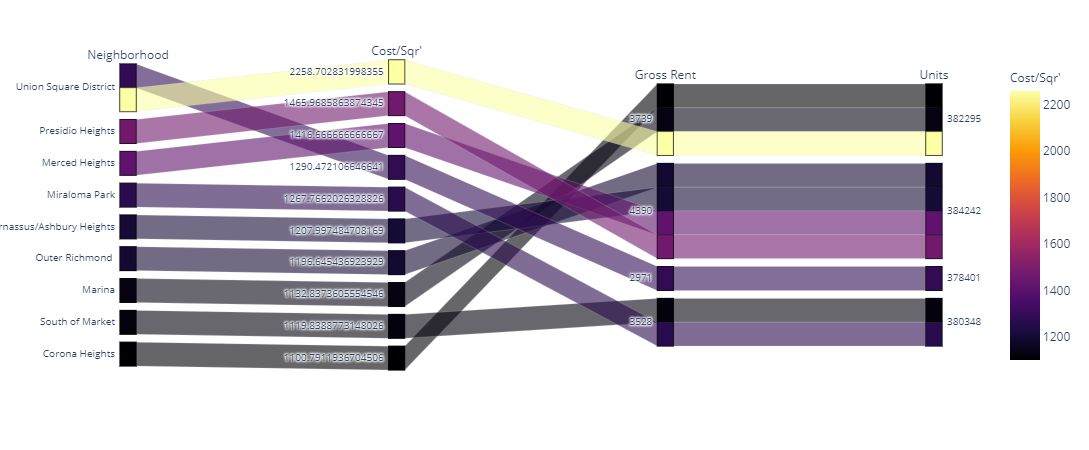

In [54]:
# Parallel Categories Plot
# YOUR CODE HERE!

px.parallel_categories(
    exp_neighborhood,
    dimensions=["neighborhood","sale_price_sqr_foot", "gross_rent", "housing_units"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot":"Cost/Sqr'",
        "gross_rent":"Gross Rent",
        "housing_units": "Units",
    },
)

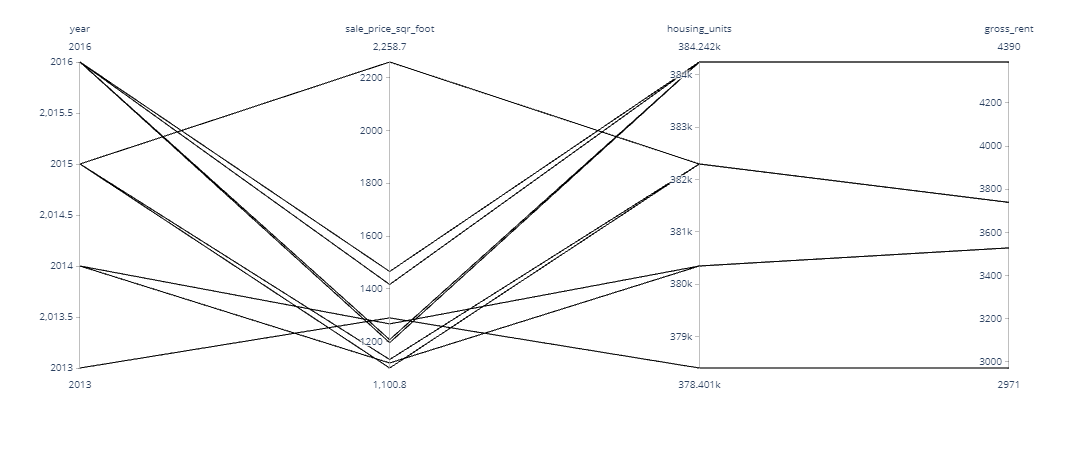

In [55]:
# Parallel Coordinates Plot

# YOUR CODE HERE!
parallel_coordinates = px.parallel_coordinates(exp_neighborhood, color="neighborhood")
parallel_coordinates

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

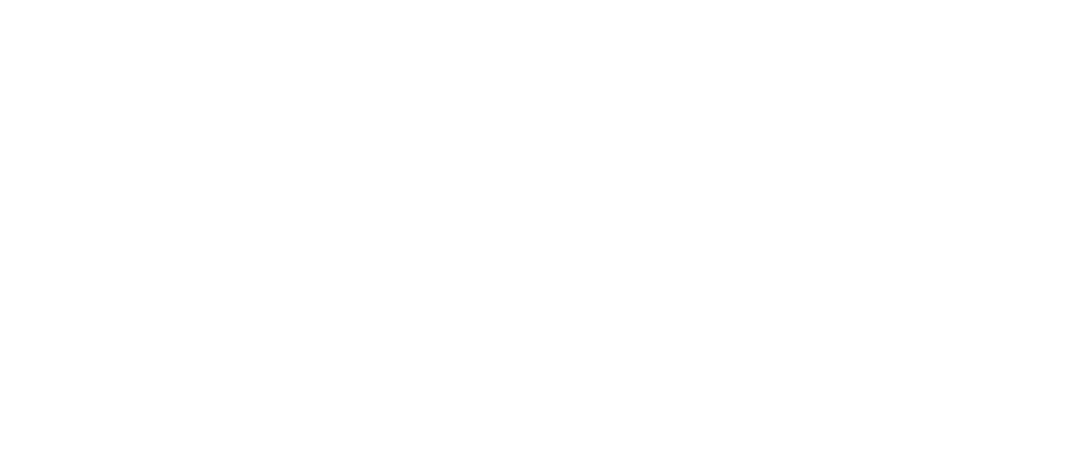

In [56]:
# Sunburst Plot
# YOUR CODE HERE!
Sunburst_graph =px.sunburst(
    exp_neighborhood,
    names='gross_rent',
    parents='neighborhood',
    values='gross_rent',
)
Sunburst_graph.show()